# NumPy


<a id='index-1'></a>

## Contents

- [NumPy](#NumPy)  
  - [Overview](#Overview)  
  - [NumPy Arrays](#NumPy-Arrays)  
  - [Arithmetic Operations](#Arithmetic-Operations)  
  - [Matrix Multiplication](#Matrix-Multiplication)  
  - [Broadcasting](#Broadcasting)  
  - [Mutability and Copying Arrays](#Mutability-and-Copying-Arrays)  
  - [Additional Functionality](#Additional-Functionality)  
  - [Exercises](#Exercises)  

> “Let’s be clear: the work of science has nothing whatever to do with consensus.  Consensus is the business of politics. Science, on the contrary, requires only one investigator who happens to be right, which means that he or she has results that are verifiable by reference to the real world. In science consensus is irrelevant. What is relevant is reproducible results.” – Michael Crichton

## Overview

[NumPy](https://en.wikipedia.org/wiki/NumPy) is a first-rate library for numerical programming

- Widely used in academia, finance and industry.  
- Mature, fast, stable and under continuous development.  


We have already seen some code involving NumPy in the preceding lectures.

In this lecture, we will start a more systematic discussion of both

- NumPy arrays and  
- the fundamental array processing operations provided by NumPy.  

### References

- [The official NumPy documentation](http://docs.scipy.org/doc/numpy/reference/).  



<a id='numpy-array'></a>

## NumPy Arrays


<a id='index-2'></a>
The essential problem that NumPy solves is fast array processing.

The most important structure that NumPy defines is an array data type formally called a [numpy.ndarray](http://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html).

NumPy arrays power a large proportion of the scientific Python ecosystem.

Let’s first import the library.

In [1]:
import numpy as np

To create a NumPy array containing only zeros we use  [np.zeros](http://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html#numpy.zeros)

In [2]:
a = np.zeros(3)
a

array([0., 0., 0.])

In [3]:
type(a)

numpy.ndarray

NumPy arrays are somewhat like native Python lists, except that

- Data *must be homogeneous* (all elements of the same type).  
- These types must be one of the [data types](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html) (`dtypes`) provided by NumPy.  


The most important of these dtypes are:

- float64: 64 bit floating-point number  
- int64: 64 bit integer  
- bool:  8 bit True or False  


There are also dtypes to represent complex numbers, unsigned integers, etc.

On modern machines, the default dtype for arrays is `float64`

In [4]:
a = np.zeros(3)
type(a[0])

numpy.float64

If we want to use integers we can specify as follows:

In [5]:
a = np.zeros(3, dtype=int)
type(a[0])

numpy.int64


<a id='numpy-shape-dim'></a>

### Shape and Dimension


<a id='index-3'></a>
Consider the following assignment

In [6]:
z = np.zeros(10)

Here `z` is a *flat* array with no dimension — neither row nor column vector.

The dimension is recorded in the `shape` attribute, which is a tuple

In [7]:
z.shape

(10,)

Here the shape tuple has only one element, which is the length of the array (tuples with one element end with a comma).

To give it dimension, we can change the `shape` attribute

In [8]:
z.shape = (10, 1)
z

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [9]:
z = np.zeros(4)
z.shape = (2, 2)
z

array([[0., 0.],
       [0., 0.]])

In the last case, to make the 2 by 2 array, we could also pass a tuple to the `zeros()` function, as
in `z = np.zeros((2, 2))`.


<a id='creating-arrays'></a>

### Creating Arrays


<a id='index-4'></a>
As we’ve seen, the `np.zeros` function creates an array of zeros.

You can probably guess what `np.ones` creates.

Related is `np.empty`, which creates arrays in memory that can later be populated with data

In [10]:
z = np.empty(3)
z

array([0., 0., 0.])

The numbers you see here are garbage values.

(Python allocates 3 contiguous 64 bit pieces of memory, and the existing contents of those memory slots are interpreted as `float64` values)

To set up a grid of evenly spaced numbers use `np.linspace`

In [11]:
z = np.linspace(2, 4, 5)  # From 2 to 4, with 5 elements

To create an identity matrix use either `np.identity` or `np.eye`

In [12]:
z = np.identity(2)
z

array([[1., 0.],
       [0., 1.]])

In addition, NumPy arrays can be created from Python lists, tuples, etc. using `np.array`

In [13]:
z = np.array([10, 20])                 # ndarray from Python list
z

array([10, 20])

In [14]:
type(z)

numpy.ndarray

In [15]:
z = np.array((10, 20), dtype=float)    # Here 'float' is equivalent to 'np.float64'
z

array([10., 20.])

In [16]:
z = np.array([[1, 2], [3, 4]])         # 2D array from a list of lists
z

array([[1, 2],
       [3, 4]])

See also `np.asarray`, which performs a similar function, but does not make
a distinct copy of data already in a NumPy array.

In [17]:
na = np.linspace(10, 20, 2)
na is np.asarray(na)   # Does not copy NumPy arrays

True

In [18]:
na is np.array(na)     # Does make a new copy --- perhaps unnecessarily

False

To read in the array data from a text file containing numeric data use `np.loadtxt`
or `np.genfromtxt`—see [the documentation](http://docs.scipy.org/doc/numpy/reference/routines.io.html) for details.

### Array Indexing


<a id='index-5'></a>
For a flat array, indexing is the same as Python sequences:

In [19]:
z = np.linspace(1, 2, 5)
z

array([1.  , 1.25, 1.5 , 1.75, 2.  ])

In [20]:
z[0]

1.0

In [21]:
z[0:2]  # Two elements, starting at element 0

array([1.  , 1.25])

In [22]:
z[-1]

2.0

For 2D arrays the index syntax is as follows:

In [23]:
z = np.array([[1, 2], [3, 4]])
z

array([[1, 2],
       [3, 4]])

In [24]:
z[0, 0]

1

In [25]:
z[0, 1]

2

And so on.

Note that indices are still zero-based, to maintain compatibility with Python sequences.

Columns and rows can be extracted as follows

In [26]:
z[0, :]

array([1, 2])

In [27]:
z[:, 1]

array([2, 4])

NumPy arrays of integers can also be used to extract elements

In [28]:
z = np.linspace(2, 4, 5)
z

array([2. , 2.5, 3. , 3.5, 4. ])

In [29]:
indices = np.array((0, 2, 3))
z[indices]

array([2. , 3. , 3.5])

Finally, an array of `dtype bool` can be used to extract elements

In [30]:
z

array([2. , 2.5, 3. , 3.5, 4. ])

In [31]:
d = np.array([0, 1, 1, 0, 0], dtype=bool)
d

array([False,  True,  True, False, False])

In [32]:
z[d]

array([2.5, 3. ])

We’ll see why this is useful below.

An aside: all elements of an array can be set equal to one number using slice notation

In [33]:
z = np.empty(3)
z

array([2. , 3. , 3.5])

In [34]:
z[:] = 42
z

array([42., 42., 42.])

### Array Methods


<a id='index-6'></a>
Arrays have useful methods, all of which are carefully optimized

In [35]:
a = np.array((4, 3, 2, 1))
a

array([4, 3, 2, 1])

In [36]:
a.sort()              # Sorts a in place
a

array([1, 2, 3, 4])

In [37]:
a.sum()               # Sum

10

In [38]:
a.mean()              # Mean

2.5

In [39]:
a.max()               # Max

4

In [40]:
a.argmax()            # Returns the index of the maximal element

3

In [41]:
a.cumsum()            # Cumulative sum of the elements of a

array([ 1,  3,  6, 10])

In [42]:
a.cumprod()           # Cumulative product of the elements of a

array([ 1,  2,  6, 24])

In [43]:
a.var()               # Variance

1.25

In [44]:
a.std()               # Standard deviation

1.118033988749895

In [45]:
a.shape = (2, 2)
a.T                   # Equivalent to a.transpose()

array([[1, 3],
       [2, 4]])

Another method worth knowing is `searchsorted()`.

If `z` is a nondecreasing array, then `z.searchsorted(a)` returns the index of the first element of `z` that is `>= a`

In [46]:
z = np.linspace(2, 4, 5)
z

array([2. , 2.5, 3. , 3.5, 4. ])

In [47]:
z.searchsorted(2.2)

1

Many of the methods discussed above have equivalent functions in the NumPy namespace

In [48]:
a = np.array((4, 3, 2, 1))

In [49]:
np.sum(a)

10

In [50]:
np.mean(a)

2.5

## Arithmetic Operations


<a id='index-7'></a>
The operators `+`, `-`, `*`, `/` and `**` all act *elementwise* on arrays

In [51]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])
a + b

array([ 6,  8, 10, 12])

In [52]:
a * b

array([ 5, 12, 21, 32])

We can add a scalar to each element as follows

In [53]:
a + 10

array([11, 12, 13, 14])

Scalar multiplication is similar

In [54]:
a * 10

array([10, 20, 30, 40])

The two-dimensional arrays follow the same general rules

In [55]:
A = np.ones((2, 2))
B = np.ones((2, 2))
A + B

array([[2., 2.],
       [2., 2.]])

In [56]:
A + 10

array([[11., 11.],
       [11., 11.]])

In [57]:
A * B

array([[1., 1.],
       [1., 1.]])


<a id='numpy-matrix-multiplication'></a>
In particular, `A * B` is *not* the matrix product, it is an element-wise product.

## Matrix Multiplication


<a id='index-9'></a>
With Anaconda’s scientific Python package based around Python 3.5 and above,
one can use the `@` symbol for matrix multiplication, as follows:

In [58]:
A = np.ones((2, 2))
B = np.ones((2, 2))
A @ B

array([[2., 2.],
       [2., 2.]])

(For older versions of Python and NumPy you need to use the [np.dot](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) function)

We can also use `@` to take the inner product of two flat arrays

In [59]:
A = np.array((1, 2))
B = np.array((10, 20))
A @ B

50

In fact, we can use `@` when one element is a Python list or tuple

In [60]:
A = np.array(((1, 2), (3, 4)))
A

array([[1, 2],
       [3, 4]])

In [61]:
A @ (0, 1)

array([2, 4])

Since we are post-multiplying, the tuple is treated as a column vector.


<a id='broadcasting'></a>

## Broadcasting


<a id='index-10'></a>
(This section extends an excellent discussion of broadcasting provided by [Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html).)

>**Note**
>
>Broadcasting is a very important aspect of NumPy. At the same time, advanced broadcasting is relatively complex and some of the details below can be skimmed on first pass.

In element-wise operations, arrays may not have the same shape.

When this happens, NumPy will automatically expand arrays to the same shape whenever possible.

This useful (but sometimes confusing) feature in NumPy is called **broadcasting**.

The value of broadcasting is that

- `for` loops can be avoided, which helps numerical code run fast and  
- broadcasting can allow us to implement operations on arrays without actually creating some dimensions of these arrays in memory, which can be important when arrays are large.  


For example, suppose `a` is a $ 3 \times 3 $ array (`a -> (3, 3)`), while `b` is a flat array with three elements (`b -> (3,)`).

When adding them together, NumPy will automatically expand `b -> (3,)` to `b -> (3, 3)`.

The element-wise addition will result in a $ 3 \times 3 $ array

In [62]:
a = np.array(
        [[1, 2, 3], 
         [4, 5, 6], 
         [7, 8, 9]])
b = np.array([3, 6, 9])

a + b

array([[ 4,  8, 12],
       [ 7, 11, 15],
       [10, 14, 18]])

Here is a visual representation of this broadcasting operation:

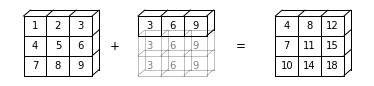

In [63]:
# Adapted and modified based on the code in the book written by Jake VanderPlas (see https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Broadcasting)
# Originally from astroML: see http://www.astroml.org/book_figures/appendix/fig_broadcast_visual.html

import numpy as np
from matplotlib import pyplot as plt


def draw_cube(ax, xy, size, depth=0.4,
              edges=None, label=None, label_kwargs=None, **kwargs):
    """draw and label a cube.  edges is a list of numbers between
    1 and 12, specifying which of the 12 cube edges to draw"""
    if edges is None:
        edges = range(1, 13)

    x, y = xy

    if 1 in edges:
        ax.plot([x, x + size],
                [y + size, y + size], **kwargs)
    if 2 in edges:
        ax.plot([x + size, x + size],
                [y, y + size], **kwargs)
    if 3 in edges:
        ax.plot([x, x + size],
                [y, y], **kwargs)
    if 4 in edges:
        ax.plot([x, x],
                [y, y + size], **kwargs)

    if 5 in edges:
        ax.plot([x, x + depth],
                [y + size, y + depth + size], **kwargs)
    if 6 in edges:
        ax.plot([x + size, x + size + depth],
                [y + size, y + depth + size], **kwargs)
    if 7 in edges:
        ax.plot([x + size, x + size + depth],
                [y, y + depth], **kwargs)
    if 8 in edges:
        ax.plot([x, x + depth],
                [y, y + depth], **kwargs)

    if 9 in edges:
        ax.plot([x + depth, x + depth + size],
                [y + depth + size, y + depth + size], **kwargs)
    if 10 in edges:
        ax.plot([x + depth + size, x + depth + size],
                [y + depth, y + depth + size], **kwargs)
    if 11 in edges:
        ax.plot([x + depth, x + depth + size],
                [y + depth, y + depth], **kwargs)
    if 12 in edges:
        ax.plot([x + depth, x + depth],
                [y + depth, y + depth + size], **kwargs)

    if label:
        if label_kwargs is None:
            label_kwargs = {}
        ax.text(x + 0.5 * size, y + 0.5 * size, label,
                ha='center', va='center', **label_kwargs)

solid = dict(c='black', ls='-', lw=1,
             label_kwargs=dict(color='k'))
dotted = dict(c='black', ls='-', lw=0.5, alpha=0.5,
              label_kwargs=dict(color='gray'))
depth = 0.3

# Draw a figure and axis with no boundary
fig = plt.figure(figsize=(5, 1), facecolor='w')
ax = plt.axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)

# first block
draw_cube(ax, (1, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '1', **solid)
draw_cube(ax, (2, 7.5), 1, depth, [1, 2, 3, 6, 9], '2', **solid)
draw_cube(ax, (3, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '3', **solid)

draw_cube(ax, (1, 6.5), 1, depth, [2, 3, 4], '4', **solid)
draw_cube(ax, (2, 6.5), 1, depth, [2, 3], '5', **solid)
draw_cube(ax, (3, 6.5), 1, depth, [2, 3, 7, 10], '6', **solid)

draw_cube(ax, (1, 5.5), 1, depth, [2, 3, 4], '7', **solid)
draw_cube(ax, (2, 5.5), 1, depth, [2, 3], '8', **solid)
draw_cube(ax, (3, 5.5), 1, depth, [2, 3, 7, 10], '9', **solid)

# second block
draw_cube(ax, (6, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '3', **solid)
draw_cube(ax, (7, 7.5), 1, depth, [1, 2, 3, 6, 9], '6', **solid)
draw_cube(ax, (8, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '9', **solid)

draw_cube(ax, (6, 6.5), 1, depth, range(2, 13), '3', **dotted)
draw_cube(ax, (7, 6.5), 1, depth, [2, 3, 6, 7, 9, 10, 11], '6', **dotted)
draw_cube(ax, (8, 6.5), 1, depth, [2, 3, 6, 7, 9, 10, 11], '9', **dotted)

draw_cube(ax, (6, 5.5), 1, depth, [2, 3, 4, 7, 8, 10, 11, 12], '3', **dotted)
draw_cube(ax, (7, 5.5), 1, depth, [2, 3, 7, 10, 11], '6', **dotted)
draw_cube(ax, (8, 5.5), 1, depth, [2, 3, 7, 10, 11], '9', **dotted)

# third block
draw_cube(ax, (12, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '4', **solid)
draw_cube(ax, (13, 7.5), 1, depth, [1, 2, 3, 6, 9], '8', **solid)
draw_cube(ax, (14, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '12', **solid)

draw_cube(ax, (12, 6.5), 1, depth, [2, 3, 4], '7', **solid)
draw_cube(ax, (13, 6.5), 1, depth, [2, 3], '11', **solid)
draw_cube(ax, (14, 6.5), 1, depth, [2, 3, 7, 10], '15', **solid)

draw_cube(ax, (12, 5.5), 1, depth, [2, 3, 4], '10', **solid)
draw_cube(ax, (13, 5.5), 1, depth, [2, 3], '14', **solid)
draw_cube(ax, (14, 5.5), 1, depth, [2, 3, 7, 10], '18', **solid)

ax.text(5, 7.0, '+', size=12, ha='center', va='center')
ax.text(10.5, 7.0, '=', size=12, ha='center', va='center');

How about `b -> (3, 1)`?

In this case, NumPy will automatically expand `b -> (3, 1)` to `b -> (3, 3)`.

Element-wise addition will then result in a $ 3 \times 3 $ matrix

In [64]:
b.shape = (3, 1)

a + b

array([[ 4,  5,  6],
       [10, 11, 12],
       [16, 17, 18]])

Here is a visual representation of this broadcasting operation:

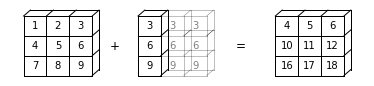

In [65]:
fig = plt.figure(figsize=(5, 1), facecolor='w')
ax = plt.axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)

# first block
draw_cube(ax, (1, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '1', **solid)
draw_cube(ax, (2, 7.5), 1, depth, [1, 2, 3, 6, 9], '2', **solid)
draw_cube(ax, (3, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '3', **solid)

draw_cube(ax, (1, 6.5), 1, depth, [2, 3, 4], '4', **solid)
draw_cube(ax, (2, 6.5), 1, depth, [2, 3], '5', **solid)
draw_cube(ax, (3, 6.5), 1, depth, [2, 3, 7, 10], '6', **solid)

draw_cube(ax, (1, 5.5), 1, depth, [2, 3, 4], '7', **solid)
draw_cube(ax, (2, 5.5), 1, depth, [2, 3], '8', **solid)
draw_cube(ax, (3, 5.5), 1, depth, [2, 3, 7, 10], '9', **solid)

# second block
draw_cube(ax, (6, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 7, 9, 10], '3', **solid)
draw_cube(ax, (7, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '3', **dotted)
draw_cube(ax, (8, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '3', **dotted)

draw_cube(ax, (6, 6.5), 1, depth, [2, 3, 4, 7, 10], '6', **solid)
draw_cube(ax, (7, 6.5), 1, depth, [2, 3, 6, 7, 9, 10, 11], '6', **dotted)
draw_cube(ax, (8, 6.5), 1, depth, [2, 3, 6, 7, 9, 10, 11], '6', **dotted)

draw_cube(ax, (6, 5.5), 1, depth, [2, 3, 4, 7, 10], '9', **solid)
draw_cube(ax, (7, 5.5), 1, depth, [2, 3, 7, 10, 11], '9', **dotted)
draw_cube(ax, (8, 5.5), 1, depth, [2, 3, 7, 10, 11], '9', **dotted)

# third block
draw_cube(ax, (12, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '4', **solid)
draw_cube(ax, (13, 7.5), 1, depth, [1, 2, 3, 6, 9], '5', **solid)
draw_cube(ax, (14, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '6', **solid)

draw_cube(ax, (12, 6.5), 1, depth, [2, 3, 4], '10', **solid)
draw_cube(ax, (13, 6.5), 1, depth, [2, 3], '11', **solid)
draw_cube(ax, (14, 6.5), 1, depth, [2, 3, 7, 10], '12', **solid)

draw_cube(ax, (12, 5.5), 1, depth, [2, 3, 4], '16', **solid)
draw_cube(ax, (13, 5.5), 1, depth, [2, 3], '17', **solid)
draw_cube(ax, (14, 5.5), 1, depth, [2, 3, 7, 10], '18', **solid)

ax.text(5, 7.0, '+', size=12, ha='center', va='center')
ax.text(10.5, 7.0, '=', size=12, ha='center', va='center');

The previous broadcasting operation is equivalent to the following `for` loop

In [66]:
row, column = a.shape
result = np.empty((3, 3))
for i in range(row):
    for j in range(column):
        result[i, j] = a[i, j] + b[i]

result

array([[ 4.,  5.,  6.],
       [10., 11., 12.],
       [16., 17., 18.]])

In some cases, both operands will be expanded.

When we have `a -> (3,)` and `b -> (3, 1)`, `a` will be expanded to `a -> (3, 3)`, and `b` will be expanded to `b -> (3, 3)`.

In this case, element-wise addition will result in a $ 3 \times 3 $ matrix

In [67]:
a = np.array([3, 6, 9])
b = np.array([2, 3, 4])
b.shape = (3, 1)

a + b

array([[ 5,  8, 11],
       [ 6,  9, 12],
       [ 7, 10, 13]])

Here is a visual representation of this broadcasting operation:

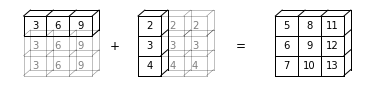

In [68]:
# Draw a figure and axis with no boundary
fig = plt.figure(figsize=(5, 1), facecolor='w')
ax = plt.axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)

# first block
draw_cube(ax, (1, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '3', **solid)
draw_cube(ax, (2, 7.5), 1, depth, [1, 2, 3, 6, 9], '6', **solid)
draw_cube(ax, (3, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '9', **solid)

draw_cube(ax, (1, 6.5), 1, depth, range(2, 13), '3', **dotted)
draw_cube(ax, (2, 6.5), 1, depth, [2, 3, 6, 7, 9, 10, 11], '6', **dotted)
draw_cube(ax, (3, 6.5), 1, depth, [2, 3, 6, 7, 9, 10, 11], '9', **dotted)

draw_cube(ax, (1, 5.5), 1, depth, [2, 3, 4, 7, 8, 10, 11, 12], '3', **dotted)
draw_cube(ax, (2, 5.5), 1, depth, [2, 3, 7, 10, 11], '6', **dotted)
draw_cube(ax, (3, 5.5), 1, depth, [2, 3, 7, 10, 11], '9', **dotted)

# second block
draw_cube(ax, (6, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 7, 9, 10], '2', **solid)
draw_cube(ax, (7, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **dotted)
draw_cube(ax, (8, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **dotted)

draw_cube(ax, (6, 6.5), 1, depth, [2, 3, 4, 7, 10], '3', **solid)
draw_cube(ax, (7, 6.5), 1, depth, [2, 3, 6, 7, 9, 10, 11], '3', **dotted)
draw_cube(ax, (8, 6.5), 1, depth, [2, 3, 6, 7, 9, 10, 11], '3', **dotted)

draw_cube(ax, (6, 5.5), 1, depth, [2, 3, 4, 7, 10], '4', **solid)
draw_cube(ax, (7, 5.5), 1, depth, [2, 3, 7, 10, 11], '4', **dotted)
draw_cube(ax, (8, 5.5), 1, depth, [2, 3, 7, 10, 11], '4', **dotted)

# third block
draw_cube(ax, (12, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '5', **solid)
draw_cube(ax, (13, 7.5), 1, depth, [1, 2, 3, 6, 9], '8', **solid)
draw_cube(ax, (14, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '11', **solid)

draw_cube(ax, (12, 6.5), 1, depth, [2, 3, 4], '6', **solid)
draw_cube(ax, (13, 6.5), 1, depth, [2, 3], '9', **solid)
draw_cube(ax, (14, 6.5), 1, depth, [2, 3, 7, 10], '12', **solid)

draw_cube(ax, (12, 5.5), 1, depth, [2, 3, 4], '7', **solid)
draw_cube(ax, (13, 5.5), 1, depth, [2, 3], '10', **solid)
draw_cube(ax, (14, 5.5), 1, depth, [2, 3, 7, 10], '13', **solid)

ax.text(5, 7.0, '+', size=12, ha='center', va='center')
ax.text(10.5, 7.0, '=', size=12, ha='center', va='center');

While broadcasting is very useful, it can sometimes seem confusing.

For example, let’s try adding `a -> (3, 2)` and `b -> (3,)`.

In [69]:
a = np.array(
      [[1, 2],
       [4, 5],
       [7, 8]])
b = np.array([3, 6, 9])

a + b

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

The `ValueError` tells us that operands could not be broadcast together.

Here is a visual representation to show why this broadcasting cannot be executed:

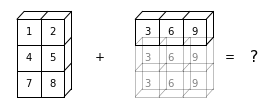

In [70]:
# Draw a figure and axis with no boundary
fig = plt.figure(figsize=(3, 1.3), facecolor='w')
ax = plt.axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)

# first block
draw_cube(ax, (1, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '1', **solid)
draw_cube(ax, (2, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **solid)

draw_cube(ax, (1, 6.5), 1, depth, [2, 3, 4], '4', **solid)
draw_cube(ax, (2, 6.5), 1, depth, [2, 3, 7, 10], '5', **solid)

draw_cube(ax, (1, 5.5), 1, depth, [2, 3, 4], '7', **solid)
draw_cube(ax, (2, 5.5), 1, depth, [2, 3, 7, 10], '8', **solid)

# second block
draw_cube(ax, (6, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '3', **solid)
draw_cube(ax, (7, 7.5), 1, depth, [1, 2, 3, 6, 9], '6', **solid)
draw_cube(ax, (8, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '9', **solid)

draw_cube(ax, (6, 6.5), 1, depth, range(2, 13), '3', **dotted)
draw_cube(ax, (7, 6.5), 1, depth, [2, 3, 6, 7, 9, 10, 11], '6', **dotted)
draw_cube(ax, (8, 6.5), 1, depth, [2, 3, 6, 7, 9, 10, 11], '9', **dotted)

draw_cube(ax, (6, 5.5), 1, depth, [2, 3, 4, 7, 8, 10, 11, 12], '3', **dotted)
draw_cube(ax, (7, 5.5), 1, depth, [2, 3, 7, 10, 11], '6', **dotted)
draw_cube(ax, (8, 5.5), 1, depth, [2, 3, 7, 10, 11], '9', **dotted)


ax.text(4.5, 7.0, '+', size=12, ha='center', va='center')
ax.text(10, 7.0, '=', size=12, ha='center', va='center')
ax.text(11, 7.0, '?', size=16, ha='center', va='center');

We can see that NumPy cannot expand the arrays to the same size.

It is because, when `b` is expanded from `b -> (3,)` to `b -> (3, 3)`, NumPy cannot match `b` with `a -> (3, 2)`.

Things get even trickier when we move to higher dimensions.

To help us, we can use the following list of rules:

- *Step 1:* When the dimensions of two arrays do not match, NumPy will expand the one with fewer dimensions by adding dimension(s) on the left of the existing dimensions.  
  - For example, if `a -> (3, 3)` and `b -> (3,)`, then broadcasting will add a dimension to the left so that `b -> (1, 3)`;  
  - If `a -> (2, 2, 2)` and `b -> (2, 2)`, then broadcasting will add a dimension to the left so that `b -> (1, 2, 2)`;  
  - If `a -> (3, 2, 2)` and `b -> (2,)`, then broadcasting will add two dimensions to the left so that `b -> (1, 1, 2)` (you can also see this process as going through *Step 1* twice).  
- *Step 2:* When the two arrays have the same dimension but different shapes, NumPy will try to expand dimensions where the shape index is 1.  
  - For example, if `a -> (1, 3)` and `b -> (3, 1)`, then broadcasting will expand dimensions with shape 1 in both `a` and `b` so that `a -> (3, 3)` and `b -> (3, 3)`;  
  - If `a -> (2, 2, 2)` and  `b -> (1, 2, 2)`, then broadcasting will expand the first dimension of `b` so that `b -> (2, 2, 2)`;  
  - If `a -> (3, 2, 2)` and `b -> (1, 1, 2)`, then broadcasting will expand `b` on all dimensions with shape 1 so that `b -> (3, 2, 2)`.  


Here are code examples for broadcasting higher dimensional arrays

In [71]:
# a -> (2, 2, 2) and  b -> (1, 2, 2)

a = np.array(
    [[[1, 2], 
      [2, 3]], 

     [[2, 3], 
      [3, 4]]])
print(f'the shape of array a is {a.shape}')

b = np.array(
    [[1,7],
     [7,1]])
print(f'the shape of array b is {b.shape}')

a + b

the shape of array a is (2, 2, 2)
the shape of array b is (2, 2)


array([[[ 2,  9],
        [ 9,  4]],

       [[ 3, 10],
        [10,  5]]])

In [72]:
# a -> (3, 2, 2) and b -> (2,)

a = np.array(
    [[[1, 2], 
      [3, 4]],

     [[4, 5], 
      [6, 7]],

     [[7, 8], 
      [9, 10]]])
print(f'the shape of array a is {a.shape}')

b = np.array([3, 6])
print(f'the shape of array b is {b.shape}')

a + b

the shape of array a is (3, 2, 2)
the shape of array b is (2,)


array([[[ 4,  8],
        [ 6, 10]],

       [[ 7, 11],
        [ 9, 13]],

       [[10, 14],
        [12, 16]]])

- *Step 3:* After Step 1 and 2, if the two arrays still do not match, a `ValueError` will be raised. For example, suppose `a -> (2, 2, 3)` and `b -> (2, 2)`  
  - By *Step 1*, `b` will be expanded to `b -> (1, 2, 2)`;  
  - By *Step 2*, `b` will be expanded to `b -> (2, 2, 2)`;  
  - We can see that they do not match each other after the first two steps. Thus, a `ValueError` will be raised  

In [73]:
a = np.array(
    [[[1, 2, 3], 
      [2, 3, 4]], 
     
     [[2, 3, 4], 
      [3, 4, 5]]])
print(f'the shape of array a is {a.shape}')

b = np.array(
    [[1,7], 
     [7,1]])
print(f'the shape of array b is {b.shape}')

a + b

the shape of array a is (2, 2, 3)
the shape of array b is (2, 2)


ValueError: operands could not be broadcast together with shapes (2,2,3) (2,2) 

## Mutability and Copying Arrays

NumPy arrays are mutable data types, like Python lists.

In other words, their contents can be altered (mutated) in memory after initialization.

We already saw examples above.

Here’s another example:

In [74]:
a = np.array([42, 44])
a

array([42, 44])

In [75]:
a[-1] = 0  # Change last element to 0
a

array([42,  0])

Mutability leads to the following behavior (which can be shocking to MATLAB programmers…)

In [76]:
a = np.random.randn(3)
a

array([-0.56117622,  0.04027311,  0.00701427])

In [77]:
b = a
b[0] = 0.0
a

array([0.        , 0.04027311, 0.00701427])

What’s happened is that we have changed `a` by changing `b`.

The name `b` is bound to `a` and becomes just another reference to the
array (the Python assignment model is described in more detail [later in the course](https://python-programming.quantecon.org/python_advanced_features.html)).

Hence, it has equal rights to make changes to that array.

This is in fact the most sensible default behavior!

It means that we pass around only pointers to data, rather than making copies.

Making copies is expensive in terms of both speed and memory.

### Making Copies

It is of course possible to make `b` an independent copy of `a` when required.

This can be done using `np.copy`

In [78]:
a = np.random.randn(3)
a

array([-1.59802899,  1.61445328, -1.65688412])

In [79]:
b = np.copy(a)
b

array([-1.59802899,  1.61445328, -1.65688412])

Now `b` is an independent copy (called a *deep copy*)

In [80]:
b[:] = 1
b

array([1., 1., 1.])

In [81]:
a

array([-1.59802899,  1.61445328, -1.65688412])

Note that the change to `b` has not affected `a`.

## Additional Functionality

Let’s look at some other useful things we can do with NumPy.

### Vectorized Functions


<a id='index-11'></a>
NumPy provides versions of the standard functions `log`, `exp`, `sin`, etc. that act *element-wise* on arrays

In [82]:
z = np.array([1, 2, 3])
np.sin(z)

array([0.84147098, 0.90929743, 0.14112001])

This eliminates the need for explicit element-by-element loops such as

In [83]:
n = len(z)
y = np.empty(n)
for i in range(n):
    y[i] = np.sin(z[i])

Because they act element-wise on arrays, these functions are called *vectorized functions*.

In NumPy-speak, they are also called *ufuncs*, which stands for “universal functions”.

As we saw above, the usual arithmetic operations (`+`, `*`, etc.) also
work element-wise, and combining these with the ufuncs gives a very large set of fast element-wise functions.

In [84]:
z

array([1, 2, 3])

In [85]:
(1 / np.sqrt(2 * np.pi)) * np.exp(- 0.5 * z**2)

array([0.24197072, 0.05399097, 0.00443185])

Not all user-defined functions will act element-wise.

For example, passing the function `f` defined below a NumPy array causes a `ValueError`

In [86]:
def f(x):
    return 1 if x > 0 else 0

The NumPy function `np.where` provides a vectorized alternative:

In [87]:
x = np.random.randn(4)
x

array([-0.00669456, -0.02495977,  1.88925615, -0.4713217 ])

In [88]:
np.where(x > 0, 1, 0)  # Insert 1 if x > 0 true, otherwise 0

array([0, 0, 1, 0])

You can also use `np.vectorize` to vectorize a given function

In [89]:
f = np.vectorize(f)
f(x)                # Passing the same vector x as in the previous example

array([0, 0, 1, 0])

However, this approach doesn’t always obtain the same speed as a more carefully crafted vectorized function.

### Comparisons


<a id='index-12'></a>
As a rule, comparisons on arrays are done element-wise

In [90]:
z = np.array([2, 3])
y = np.array([2, 3])
z == y

array([ True,  True])

In [91]:
y[0] = 5
z == y

array([False,  True])

In [92]:
z != y

array([ True, False])

The situation is similar for `>`, `<`, `>=` and `<=`.

We can also do comparisons against scalars

In [93]:
z = np.linspace(0, 10, 5)
z

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [94]:
z > 3

array([False, False,  True,  True,  True])

This is particularly useful for *conditional extraction*

In [95]:
b = z > 3
b

array([False, False,  True,  True,  True])

In [96]:
z[b]

array([ 5. ,  7.5, 10. ])

Of course we can—and frequently do—perform this in one step

In [97]:
z[z > 3]

array([ 5. ,  7.5, 10. ])

### Sub-packages

NumPy provides some additional functionality related to scientific programming
through its sub-packages.

We’ve already seen how we can generate random variables using np.random

In [98]:
z = np.random.randn(10000)  # Generate standard normals
y = np.random.binomial(10, 0.5, size=1000)    # 1,000 draws from Bin(10, 0.5)
y.mean()

4.995

Another commonly used subpackage is np.linalg

In [99]:
A = np.array([[1, 2], [3, 4]])

np.linalg.det(A)           # Compute the determinant

-2.0000000000000004

In [100]:
np.linalg.inv(A)           # Compute the inverse

array([[-2. ,  1. ],
       [ 1.5, -0.5]])


<a id='index-14'></a>
Much of this functionality is also available in [SciPy](http://www.scipy.org/), a collection of modules that are built on top of NumPy.

We’ll cover the SciPy versions in more detail [soon](https://python-programming.quantecon.org/scipy.html).

For a comprehensive list of what’s available in NumPy see [this documentation](https://docs.scipy.org/doc/numpy/reference/routines.html).

## Exercises

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

## Exercise 1

Consider the polynomial expression


<a id='equation-np-polynom'></a>
$$
p(x) = a_0 + a_1 x + a_2 x^2 + \cdots a_N x^N = \sum_{n=0}^N a_n x^n \tag{10.1}
$$

[Earlier](https://python-programming.quantecon.org/python_essentials.html#pyess_ex2), you wrote a simple function `p(x, coeff)` to evaluate [(10.1)](#equation-np-polynom) without considering efficiency.

Now write a new function that does the same job, but uses NumPy arrays and array operations for its computations, rather than any form of Python loop.

(Such functionality is already implemented as `np.poly1d`, but for the sake of the exercise don’t use this class)

Use `np.cumprod()`

## Solution to Exercise 1

This code does the job

In [102]:
def p(x, coef):
    X = np.ones_like(coef)
    X[1:] = x
    y = np.cumprod(X)   # y = [1, x, x**2,...]
    return coef @ y

Let’s test it

In [103]:
x = 2
coef = np.linspace(2, 4, 3)
print(coef)
print(p(x, coef))
# For comparison
q = np.poly1d(np.flip(coef))
print(q(x))

[2. 3. 4.]
24.0
24.0


## Exercise 2

Let `q` be a NumPy array of length `n` with `q.sum() == 1`.

Suppose that `q` represents a [probability mass function](https://en.wikipedia.org/wiki/Probability_mass_function).

We wish to generate a discrete random variable $ x $ such that $ \mathbb P\{x = i\} = q_i $.

In other words, `x` takes values in `range(len(q))` and `x = i` with probability `q[i]`.

The standard (inverse transform) algorithm is as follows:

- Divide the unit interval $ [0, 1] $ into $ n $ subintervals $ I_0, I_1, \ldots, I_{n-1} $ such that the length of $ I_i $ is $ q_i $.  
- Draw a uniform random variable $ U $ on $ [0, 1] $ and return the $ i $ such that $ U \in I_i $.  


The probability of drawing $ i $ is the length of $ I_i $, which is equal to $ q_i $.

We can implement the algorithm as follows

In [104]:
from random import uniform

def sample(q):
    a = 0.0
    U = uniform(0, 1)
    for i in range(len(q)):
        if a < U <= a + q[i]:
            return i
        a = a + q[i]

If you can’t see how this works, try thinking through the flow for a simple example, such as `q = [0.25, 0.75]`
It helps to sketch the intervals on paper.

Your exercise is to speed it up using NumPy, avoiding explicit loops

Use `np.searchsorted` and `np.cumsum`

If you can, implement the functionality as a class called `DiscreteRV`, where

- the data for an instance of the class is the vector of probabilities `q`  
- the class has a `draw()` method, which returns one draw according to the algorithm described above  


If you can, write the method so that `draw(k)` returns `k` draws from `q`.

## Solution to Exercise 2

Here’s our first pass at a solution:

In [105]:
from numpy import cumsum
from numpy.random import uniform

class DiscreteRV:
    """
    Generates an array of draws from a discrete random variable with vector of
    probabilities given by q.
    """

    def __init__(self, q):
        """
        The argument q is a NumPy array, or array like, nonnegative and sums
        to 1
        """
        self.q = q
        self.Q = cumsum(q)

    def draw(self, k=1):
        """
        Returns k draws from q. For each such draw, the value i is returned
        with probability q[i].
        """
        return self.Q.searchsorted(uniform(0, 1, size=k))

The logic is not obvious, but if you take your time and read it slowly,
you will understand.

There is a problem here, however.

Suppose that `q` is altered after an instance of `discreteRV` is
created, for example by

In [106]:
q = (0.1, 0.9)
d = DiscreteRV(q)
d.q = (0.5, 0.5)

The problem is that `Q` does not change accordingly, and `Q` is the
data used in the `draw` method.

To deal with this, one option is to compute `Q` every time the draw
method is called.

But this is inefficient relative to computing `Q` once-off.

A better option is to use descriptors.

A solution from the [quantecon
library](https://github.com/QuantEcon/QuantEcon.py/tree/master/quantecon)
using descriptors that behaves as we desire can be found
[here](https://github.com/QuantEcon/QuantEcon.py/blob/master/quantecon/discrete_rv.py).

## Exercise 3

Recall our of the empirical cumulative distribution function.

Your task is to

1. Make the `__call__` method more efficient using NumPy.  
1. Add a method that plots the ECDF over $ [a, b] $, where $ a $ and $ b $ are method parameters.  

## Solution to Exercise 3

An example solution is given below.

In [107]:
"""
Modifies ecdf.py from QuantEcon to add in a plot method

"""

class ECDF:
    """
    One-dimensional empirical distribution function given a vector of
    observations.

    Parameters
    ----------
    observations : array_like
        An array of observations

    Attributes
    ----------
    observations : array_like
        An array of observations

    """

    def __init__(self, observations):
        self.observations = np.asarray(observations)

    def __call__(self, x):
        """
        Evaluates the ecdf at x

        Parameters
        ----------
        x : scalar(float)
            The x at which the ecdf is evaluated

        Returns
        -------
        scalar(float)
            Fraction of the sample less than x

        """
        return np.mean(self.observations <= x)

    def plot(self, ax, a=None, b=None):
        """
        Plot the ecdf on the interval [a, b].

        Parameters
        ----------
        a : scalar(float), optional(default=None)
            Lower endpoint of the plot interval
        b : scalar(float), optional(default=None)
            Upper endpoint of the plot interval

        """

        # === choose reasonable interval if [a, b] not specified === #
        if a is None:
            a = self.observations.min() - self.observations.std()
        if b is None:
            b = self.observations.max() + self.observations.std()

        # === generate plot === #
        x_vals = np.linspace(a, b, num=100)
        f = np.vectorize(self.__call__)
        ax.plot(x_vals, f(x_vals))
        plt.show()

Here’s an example of usage

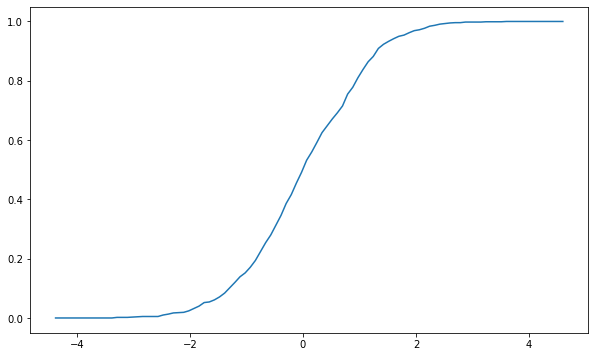

In [108]:
fig, ax = plt.subplots()
X = np.random.randn(1000)
F = ECDF(X)
F.plot(ax)

## Exercise 4

Recall that [broadcasting](#broadcasting) in Numpy can help us conduct element-wise operations on arrays with different number of dimensions without using `for` loops.

In this exercise, try to use `for` loops to replicate the result of the following broadcasting operations.

**Part1**: Try to replicate this simple example using `for` loops and compare your results with the broadcasting operation below.

In [109]:
np.random.seed(123)
x = np.random.randn(4, 4)
y = np.random.randn(4)
A = x / y

Here is the output

In [110]:
print(A)

[[-0.49214189  0.45607819  0.28183596 -3.90043439]
 [-0.26229311  0.75518888 -2.41688145 -1.11063629]
 [ 0.57387869 -0.39635354 -0.67614513 -0.2452416 ]
 [ 0.676082   -0.29216483 -0.44218937 -1.12471925]]


**Part2**: Move on to replicate the result of the following broadcasting operation. Meanwhile, compare the speeds of broadcasting and the `for` loop you implement.

In [111]:
import quantecon as qe

np.random.seed(123)
x = np.random.randn(1000, 100, 100)
y = np.random.randn(100)

qe.tic()
B = x / y
qe.toc()

ModuleNotFoundError: No module named 'quantecon'

Here is the output

In [112]:
print(B)

[10 20]


## Solution to Exercise 4

**Part 1 Solution**

In [113]:
np.random.seed(123)
x = np.random.randn(4, 4)
y = np.random.randn(4)

C = np.empty_like(x)
n = len(x)
for i in range(n):
    for j in range(n):
        C[i, j] = x[i, j] / y[j]

Compare the results to check your answer

In [114]:
print(C)

[[-0.49214189  0.45607819  0.28183596 -3.90043439]
 [-0.26229311  0.75518888 -2.41688145 -1.11063629]
 [ 0.57387869 -0.39635354 -0.67614513 -0.2452416 ]
 [ 0.676082   -0.29216483 -0.44218937 -1.12471925]]


You can also use `array_equal()` to check your answer

In [115]:
print(np.array_equal(A, C))

True


**Part 2 Solution**

In [116]:
import time

np.random.seed(123)
x = np.random.randn(1000, 100, 100)
y = np.random.randn(100)

t = time.time()
D = np.empty_like(x)
d1, d2, d3 = x.shape
for i in range(d1):
    for j in range(d2):
        for k in range(d3):
            D[i, j, k] = x[i, j, k] / y[k]
elapsed = time.time() - t
print(elapsed)

4.849611520767212


Note that the `for` loop takes much longer than the broadcasting operation.

Compare the results to check your answer

In [117]:
print(D)

[[[ 1.85764005 -0.89419976  0.24485371 ... -3.04214618  0.17711597
   -0.22643801]
  [-1.09863014  1.77333433  0.61630351 ... -0.24732757 -0.15931155
   -0.13015397]
  [-1.20344529  0.53624915  1.90420857 ...  0.92748804  0.07494711
    0.48954772]
  ...
  [-1.09763323  0.68632802 -1.21568707 ... -3.87025031 -0.19456046
    0.18331773]
  [-0.47546852 -0.16883695  2.92991418 ... -0.05967182 -0.20796073
   -0.49082994]
  [ 1.14380091  1.93460538 -0.76305492 ... -1.0537099   0.27167901
    0.57963424]]

 [[ 2.12344323  0.28058176 -0.73457091 ...  3.55049699  0.59737154
   -0.31414907]
  [ 1.40074417 -0.09113173  0.50276294 ... -1.85572391  0.13914077
   -0.93776321]
  [ 2.35739042 -0.79089649  0.20835615 ... -0.11001198  0.86250367
   -1.26949634]
  ...
  [ 2.11831946  0.15242396 -0.17269536 ...  0.03469371 -0.06074779
    0.10114045]
  [-0.08300138  0.47232405 -0.89930099 ...  0.66104947 -0.45183377
   -1.05885526]
  [ 0.282155   -1.44848315 -1.25832989 ... -3.12998376  0.48762406
    0.

In [118]:
print(np.array_equal(B, D))

False
